In [34]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

%matplotlib inline


In [35]:
df = pd.read_csv('rawdata.csv')

In [36]:
df.head(20)

,Tweets,Retweets,Likes,Date
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58
6,@dogeofficialceo @mtaibbi 🤣💪,194,3611,2022-10-26 17:18:30
7,@mtaibbi 🤣,117,2848,2022-10-26 17:14:07
8,@ARodTV Definitely closer to citizen journalis...,699,10189,2022-10-26 17:05:16
9,@sandyleevincent Nobody bats 1000 🤷‍♂️,126,2920,2022-10-26 15:42:50


df.info()

Data cleaning

In [37]:
#defining a function to clean the tweets

def cleantwt (twt):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

  twt = re.sub('RT', '', twt) # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt) # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt) # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt) # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt) # remove leading and trailing whitespaces
  twt = re.sub(emoj, '', twt) # remove emojis
  return twt

In [38]:
# cleaning tweets to a new column 'Cleaned_Tweets'
df['cleaned_tweets'] = df['Tweets'].apply(cleantwt)

In [39]:
df.head()

,Tweets,Retweets,Likes,Date,cleaned_tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!


In [40]:
#dropping rows with empty string
df.drop(df[df['cleaned_tweets'] == ''].index, inplace = True)

In [41]:
df.head()

,Tweets,Retweets,Likes,Date,cleaned_tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!


In [42]:
#counting duplicates in df

df.duplicated().sum()

0

In [43]:
#defining function to get subjectivity

def getsubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

#defining function to get polarity

def getpolarity(twt):
    return TextBlob(twt).sentiment.polarity

In [46]:
df['subjectivity'] = df['cleaned_tweets'].apply(getsubjectivity)

In [48]:
df.head()

,Tweets,Retweets,Likes,Date,cleaned_tweets,subjectivity
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,0.90
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,0.00
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!,0.65
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!,0.00


In [49]:
df['polarity'] = df['cleaned_tweets'].apply(getpolarity)

In [50]:
df.head()

,Tweets,Retweets,Likes,Date,cleaned_tweets,subjectivity,polarity
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20,0.2000
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,0.90,0.2000
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,0.00,0.0000
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!,0.65,0.4375
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!,0.00,0.0000


In [51]:
#creating a function to classify sentiment as positive/negative/neutral

def getsentiment(value):
    if value < 0:
        return 'negative'
    elif value > 0:
        return 'positive'
    else:
        return 'neutral'

In [53]:
df['sentiment'] = df['polarity'].apply(getsentiment)

In [54]:
df.head()

,Tweets,Retweets,Likes,Date,cleaned_tweets,subjectivity,polarity,sentiment
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20,0.2000,positive
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,0.90,0.2000,positive
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,0.00,0.0000,neutral
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!,0.65,0.4375,positive
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!,0.00,0.0000,neutral


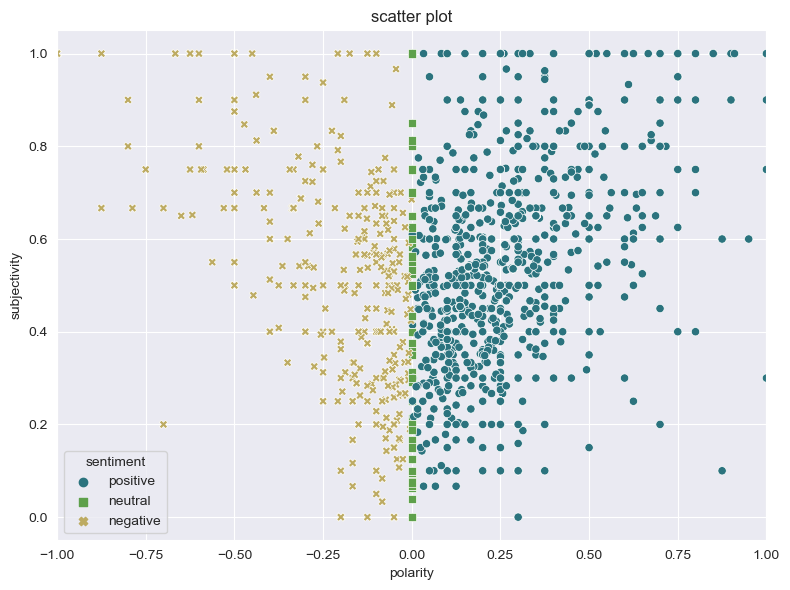

In [55]:
#create scatter plot

sns.set_style('darkgrid')
plt.figure(figsize = (8,6))

markers = {'positive' : 'o', 'neutral' : 's', 'negative' : 'X'}

sns.scatterplot(data=df, x='polarity', y='subjectivity', hue='sentiment'
               ,style='sentiment', markers=markers, palette='gist_earth').set(xlim=(-1,1))
plt.title('scatter plot')
plt.xlabel('polarity')
plt.ylabel('subjectivity')

plt.tight_layout()

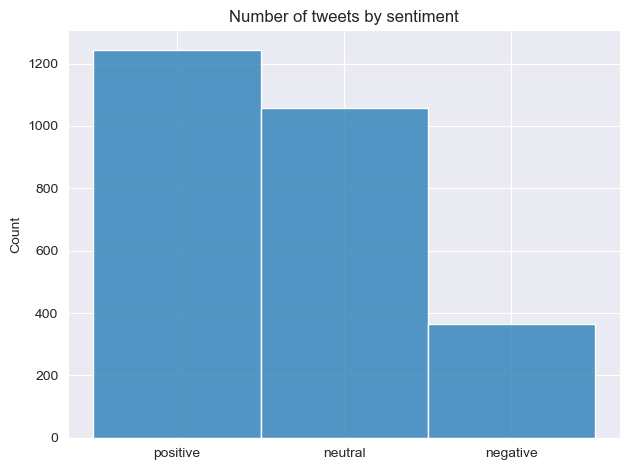

In [56]:
#barchart to count tweets according to its sentiment values

sns.histplot(df, x = 'sentiment' ).set(xlabel = None )
plt.title('Number of tweets by sentiment')

plt.tight_layout()